<a href="https://colab.research.google.com/github/arijitar/Machine-Learning/blob/main/Batch_vs_schochastic_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import time

In [18]:
df = pd.read_csv('Social_Network_Ads.csv')

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
df = df[['Age','EstimatedSalary','Purchased']]

In [21]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [24]:
# As inputs are in different scale so scaling input values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [25]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=1)

In [26]:
# X_train.shape

In [27]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [28]:
model = Sequential()

model.add(Dense(10,activation='relu', input_dim =2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled, y, epochs=500, batch_size=400, validation_split=0.2)
# print(time.time() - start)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9281 - loss: 0.2596 - val_accuracy: 0.8000 - val_loss: 0.4654
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step - accuracy: 0.9281 - loss: 0.2501 - val_accuracy: 0.7875 - val_loss: 0.4697
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.9281 - loss: 0.2451 - val_accuracy: 0.7750 - val_loss: 0.4711
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.9281 - loss: 0.2416 - val_accuracy: 0.7750 - val_loss: 0.4710
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.9281 - loss: 0.2392 - val_accuracy: 0.7750 - val_loss: 0.4699
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9219 - loss: 0.2372 - val_accuracy: 0.7750 - val_loss: 0.4689
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9219 - loss: 0.2353 - val_accuracy: 0.7750 - val_loss: 0.4677
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9219 - loss: 0.2335 - val_accuracy: 0.7750 - val_

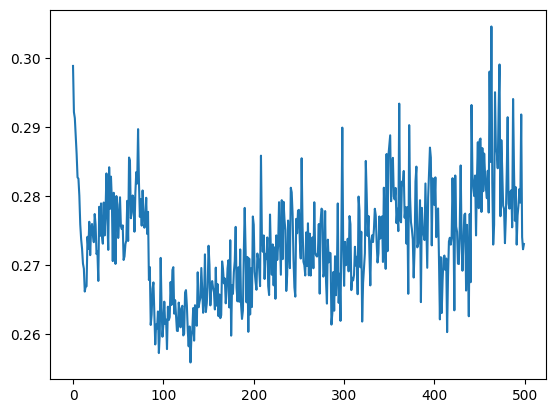

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])


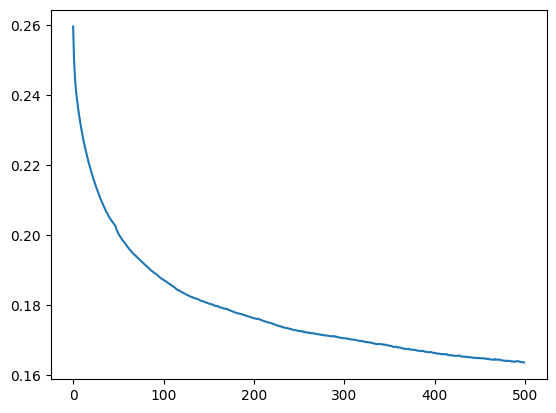

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])